# 2058. Find the Minimum and Maximum Number of Nodes Between Critical Points
https://leetcode.com/problems/find-the-minimum-and-maximum-number-of-nodes-between-critical-points/description/?envType=daily-question&envId=2024-07-05

In [58]:
from typing import List,Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    def __repr__(self): #print ans = func result
        return f"{self.val}-->{self.next}" if self.next else f"{self.val}"

head = [2,3,3,2]

In [52]:
def nodesBetweenCriticalPoints(head: Optional[ListNode]) -> List[int]:
    if head.next.next==None:
        return [-1,-1]
    find_max_mid = []
    loc = 1
    minDistance = 100000
    while head.next.next:
        left_link = head.val
        mid_link = head.next.val
        right_link = head.next.next.val
        #print(left_link,mid_link,right_link)
        if mid_link > left_link and mid_link > right_link: # maxima
            find_max_mid.append(loc)
            #print("maximal",left_link,mid_link,right_link,loc)
        elif mid_link < left_link and mid_link < right_link: # minima 
            find_max_mid.append(loc)
            #print("minima",left_link,mid_link,right_link,loc)
        if len(find_max_mid)>1:
            distance = find_max_mid[-1]-find_max_mid[-2]
            if minDistance > distance:
                minDistance = distance
        loc +=1 
        head = head.next
    if len(find_max_mid)>1:
        return [minDistance,find_max_mid[-1]-find_max_mid[0]]
    return [-1,-1]

In [53]:
link = ListNode(head[0])
pointer = link
for ele in head[1:]: #塞值
    pointer.next = ListNode(ele)
    pointer = pointer.next
print("input link = ",link)
nodesBetweenCriticalPoints(link)

input link =  2-->3-->3-->2


[-1, -1]

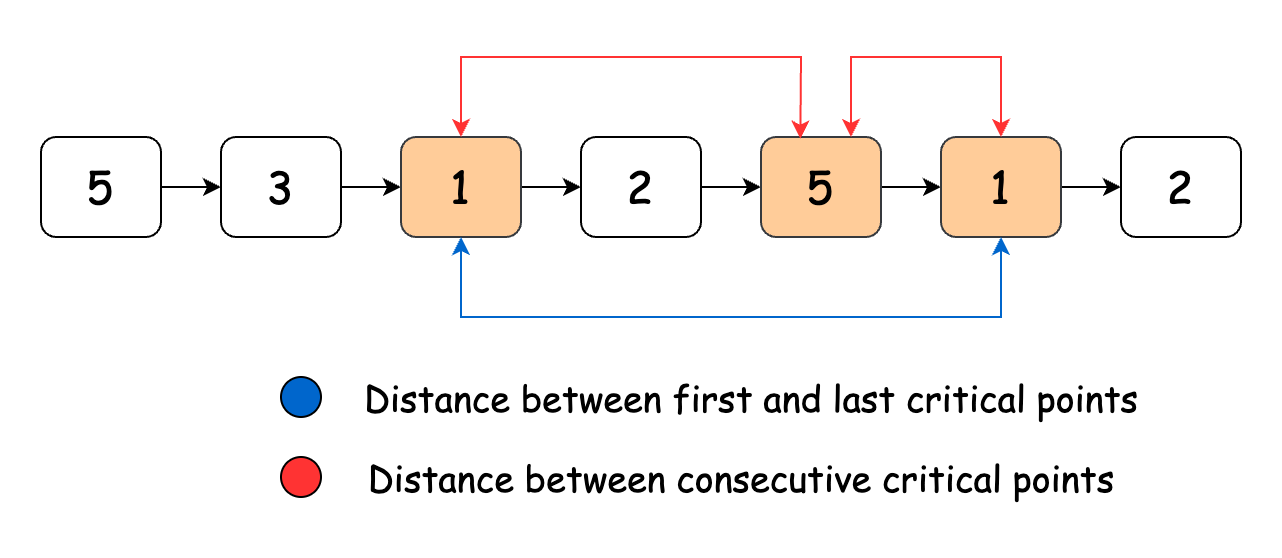

# GPT
1. 遍歷鏈結列表並記錄所有臨界點的索引。
2. 計算最小距離和最大距離。

In [60]:
def findCriticalPoints(head):
    if not head or not head.next or not head.next.next:
        return [-1, -1]

    prev, curr, next = head, head.next, head.next.next
    index = 1
    critical_points = []

    while next:
        if (curr.val > prev.val and curr.val > next.val) or (curr.val < prev.val and curr.val < next.val):
            critical_points.append(index)
        prev = curr
        curr = next
        next = next.next
        index += 1

    if len(critical_points) < 2:
        return [-1, -1]

    min_distance = float('inf')
    for i in range(1, len(critical_points)):
        min_distance = min(min_distance, critical_points[i] - critical_points[i - 1])

    max_distance = critical_points[-1] - critical_points[0]

    return [min_distance, max_distance]

# 示例
head = ListNode(5, ListNode(3, ListNode(1, ListNode(2, ListNode(5, ListNode(1, ListNode(2)))))))
print(findCriticalPoints(head))  # 輸出: [1, 3]


[1, 3]


## 方法說明
    1. 初始化和邊界檢查：首先檢查鏈結列表是否至少有三個節點，如果沒有，則不可能有臨界點，直接返回 [-1, -1]。

    2. 遍歷鏈結列表：

        * 使用三個指針 prev、curr 和 next 來遍歷列表。
        * 每當發現 curr 是局部最大值或最小值時，記錄當前索引到 critical_points 列表中。
    3. 計算最小和最大距離：

        * 如果 critical_points 列表中少於兩個元素，則返回 [-1, -1]。
        * 否則，計算最小距離和最大距離。
## 複雜度分析
* 時間複雜度：O(n)，其中 n 是鏈結列表中的節點數。因為我們只遍歷了一次鏈結列表。
* 空間複雜度：O(k)，其中 k 是臨界點的數量。在最壞情況下，k 可能接近 n，但一般情況下 k 會小於 n。